### Build a basic chatbot with LangGraph(Graph API)

In [4]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
# Initializing  State
class State(TypedDict): #TypedDict makes sure that the return type of this class is a dictionary
    messages:Annotated[list, add_messages]

In [36]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

# creating and calling the llm
api_key = os.getenv("GROQ_API")
llm = ChatGroq(model = "gemma2-9b-it", api_key = api_key)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001BAC5F10790>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001BAC6A22190>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [37]:
# defining the chatbot node functionality
def chatbot(state:State):
    return{"messages":[llm.invoke(state["messages"])]}

# Building the graph
graph_builder = StateGraph(State)

graph_builder.add_node("llm_chatbot", chatbot)
graph_builder.add_edge(START, "llm_chatbot")
graph_builder.add_edge("llm_chatbot", END)

#compilng the graph
graph = graph_builder.compile()

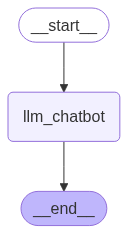

In [38]:
#Visualise the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))

except Exception :
    pass

In [41]:
# running the graph
response = graph.invoke({"messages": "Hi"})
response["messages"] #retrives all the messages
response["messages"][-1] #gets the last message
response["messages"][-1].content #gets the content of the last message

'Hi there! 👋  What can I do for you today? 😊\n'

In [52]:
for event in graph.stream({"messages":"Hi, How are you?"}): 
    #gets the conversation by event. In this case we have for the event(node) llm_chatbot
    print(event)

print("\n2nd output\n")
for event in graph.stream({"messages":"Hi, How are you?"}): 
    for value in event.values():
        print(value)

print("\n3rd output\n")
for event in graph.stream({"messages":"Hi, How are you?"}): 
    for value in event.values():
        print(value["messages"][-1].content)


{'llm_chatbot': {'messages': [AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 15, 'total_tokens': 48, 'completion_time': 0.06, 'prompt_time': 0.001932929, 'queue_time': 0.069485863, 'total_time': 0.061932929}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--b0d09ab7-3f2d-46b8-9852-0ba96d40a695-0', usage_metadata={'input_tokens': 15, 'output_tokens': 33, 'total_tokens': 48})]}}

2nd output

{'messages': [AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 15, 'total_tokens': 48, 'completion_time': 0.06, 'prompt_time': 0.001912968, 'queue_time': 0.067165121, 'total_time': 0.06191